# Face Mask detection Dataset

In [7]:
!pip install kaggle

In [8]:
!ls -l /content/face_mask_dataset.zip

-rw-r--r-- 1 root root 171127690 Jul 31 06:24 /content/face_mask_dataset.zip


In [9]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face_mask_dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

data  face_mask_dataset.zip  sample_data


Importing Dependencies

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[:10])
print(without_mask_files[:10])

['with_mask_469.jpg', 'with_mask_1442.jpg', 'with_mask_3179.jpg', 'with_mask_2649.jpg', 'with_mask_38.jpg', 'with_mask_1473.jpg', 'with_mask_2296.jpg', 'with_mask_2457.jpg', 'with_mask_1999.jpg', 'with_mask_732.jpg']
['without_mask_3272.jpg', 'without_mask_3207.jpg', 'without_mask_3582.jpg', 'without_mask_271.jpg', 'without_mask_3072.jpg', 'without_mask_523.jpg', 'without_mask_2435.jpg', 'without_mask_340.jpg', 'without_mask_1918.jpg', 'without_mask_1292.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask--> 1

without mask-->0

In [14]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[:10])
print(without_mask_labels[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


**Displaying Images**

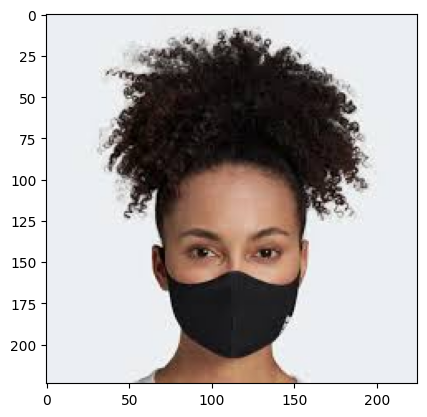

In [18]:
#displaying the images with mask
img = mpimg.imread('/content/data/with_mask/with_mask_2682.jpg')
imgplot = plt.imshow(img)
plt.show()

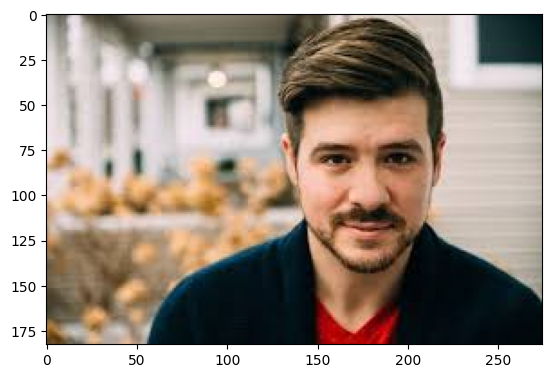

In [19]:
#displaying the images without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2744.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
#converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [25]:
type(x)

numpy.ndarray

In [26]:
x.shape, y.shape

((7553, 128, 128, 3), (7553,))

Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x.shape, x_train.shape, x_test.shape

((7553, 128, 128, 3), (6042, 128, 128, 3), (1511, 128, 128, 3))

In [29]:
#data scaling

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [30]:
x_train_scaled[0]

array([[[0.75294118, 0.70196078, 0.63529412],
        [0.75294118, 0.70196078, 0.63529412],
        [0.75294118, 0.70196078, 0.63529412],
        ...,
        [0.6745098 , 0.77254902, 0.92941176],
        [0.6745098 , 0.77254902, 0.92941176],
        [0.6745098 , 0.77647059, 0.9254902 ]],

       [[0.75294118, 0.70196078, 0.63529412],
        [0.75294118, 0.70196078, 0.63529412],
        [0.75294118, 0.70196078, 0.63529412],
        ...,
        [0.6745098 , 0.77254902, 0.92941176],
        [0.6745098 , 0.77254902, 0.92941176],
        [0.6745098 , 0.77254902, 0.92941176]],

       [[0.75686275, 0.70588235, 0.63921569],
        [0.75686275, 0.70588235, 0.63921569],
        [0.75686275, 0.70588235, 0.63921569],
        ...,
        [0.67058824, 0.76862745, 0.9254902 ],
        [0.67058824, 0.76862745, 0.92941176],
        [0.67058824, 0.77254902, 0.92941176]],

       ...,

       [[0.17647059, 0.23921569, 0.29803922],
        [0.18039216, 0.24313725, 0.30196078],
        [0.17647059, 0

array([[[192, 179, 162],
        [192, 179, 162],
        [192, 179, 162],
        ...,
        [172, 197, 237],
        [172, 197, 237],
        [172, 198, 236]],

       [[192, 179, 162],
        [192, 179, 162],
        [192, 179, 162],
        ...,
        [172, 197, 237],
        [172, 197, 237],
        [172, 197, 237]],

       [[193, 180, 163],
        [193, 180, 163],
        [193, 180, 163],
        ...,
        [171, 196, 236],
        [171, 196, 237],
        [171, 197, 237]],

       ...,

       [[ 45,  61,  76],
        [ 46,  62,  77],
        [ 45,  61,  76],
        ...,
        [153, 152, 147],
        [164, 163, 159],
        [169, 169, 170]],

       [[ 47,  63,  78],
        [ 48,  64,  79],
        [ 47,  63,  78],
        ...,
        [127, 125, 120],
        [144, 142, 138],
        [155, 156, 154]],

       [[ 49,  66,  81],
        [ 49,  66,  81],
        [ 47,  64,  79],
        ...,
        [107, 104,  97],
        [122, 120, 114],
        [137, 139, 134]]], dtype=uint8)
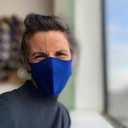

In [31]:
x_train[0]

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neutral network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 150s 863ms/step - acc: 0.7289 - loss: 0.6540 - val_acc: 0.8760 - val_loss: 0.2890
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 205s 882ms/step - acc: 0.8788 - loss: 0.3150 - val_acc: 0.9041 - val_loss: 0.2438
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 849ms/step - acc: 0.9101 - loss: 0.2250 - val_acc: 0.9107 - val_loss: 0.2326
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 206s 873ms/step - acc: 0.9238 - loss: 0.1970 - val_acc: 0.9223 - val_loss: 0.2052
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 844ms/step - acc: 0.9318 - loss: 0.1810 - val_acc: 0.9256 - val_loss: 0.2231
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 835ms/step - acc: 0.9481 - loss: 0.1358 - val_acc: 0.9256 - val_loss: 0.2046
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 819ms/step - acc: 0.9526 - loss: 0.1222 - val_acc: 0.9223 - val_loss: 0.2297
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 149s 863ms/step - acc: 0.9590 - loss: 0.1123 - val_acc: 0.9289 - val_loss: 0.2639
Epoch 9/10
170/170 ━━━━━

**Model Evalution**

In [36]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - acc: 0.9337 - loss: 0.2416
Test Accuracy = 0.9358041286468506


In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label= 'train loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label= 'train accuracy')
plt.plot(h.history['val_acc'], label= 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted:/content/data/with_mask/with_mask_1004.jpg


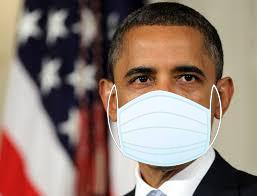

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.45054963 0.61175305]]
1
The person in the image is not wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')



Path of the image to be predicted:/content/data/with_mask/with_mask_1000.jpg


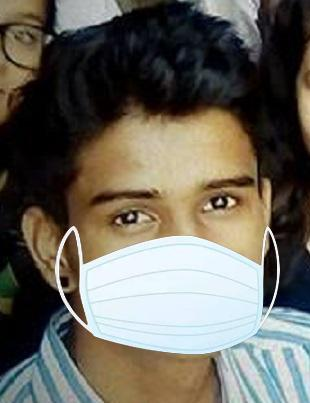

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.01320687 0.99404013]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')



Path of the image to be predicted:/content/data/with_mask/with_mask_1000.jpg


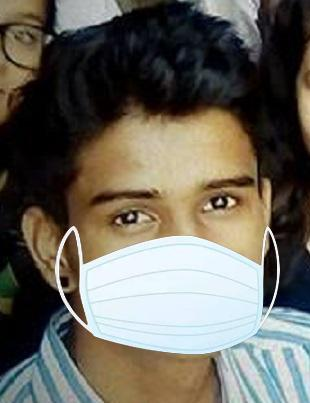

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.01320687 0.99404013]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [41]:
!rm /content/face_mask_dataset.zip